# Proyecto: Modelo de aprendizaje automático para clasificar reclamos y opiniones en TikTok. 
## Notebook 1: Análisis exploratorio de datos.

## Objetivo de la notebook:

Comprender mejor el dataset, su estructura, la presencia de datos faltantes y/o extremos, la distribución de las variables y la relación entre ellas.

#### Importar y cargar las librerías

In [1]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## IMPORTACIÓN DE LOS DATOS
#### Cargar dataset 


In [2]:
#Lectura del dataset
tik_tok1= pd.read_csv('../Data/tiktok_dataset.csv',delimiter=';',encoding='utf8')
tik_tok1

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


#### Seteo de opciones para las salidas de las funciones

In [3]:
#Para un análisis más simplificado, acotamos la cantidad de decimales de los resultados
pd.options.display.float_format = '{:.1f}'.format

## EXPLORACIÓN Y PROCESAMIENTO DE LOS DATOS

#### Inspección de los datos

In [4]:
#Vemos las primeras 5 filas
tik_tok1.head() 

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [29]:
# Cantidad de registros y variables del dataset
tik_tok1.shape

(19382, 12)

In [6]:
#Resumen del dataset 
tik_tok1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Conteo de variables según el tipo de datos 
tik_tok1.dtypes.value_counts() 

float64    5
object     4
int64      3
dtype: int64

<div class="alert alert-block alert-success">
El dataset original cuenta con 19382 registros y 12 variables. Dentro de las variables, podemos observar que 3 son de tipo integer, 5 del tipo float y 4 de tipo object. 
 
También podemos ver que la mayoría de las columnas del dataset original tienen datos faltantes.

</div>


In [8]:
#Nombres de las columnas del dataset
tik_tok1.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [9]:
#Renombramos columnas para una mejor interpretación de las variables
tik_tok1 = tik_tok1.rename(columns={
    '#': 'ID',
    'claim_status': 'tipo_declaracion',
    'video_id': 'ID_video',
    'video_duration_sec': 'duracion_video_seg',
    'video_transcription_text': 'transcripcion_video',
    'verified_status': 'estado_verificado',
    'author_ban_status': 'estado_bloqueo_autor',
    'video_view_count': 'vistas_video',
    'video_like_count': 'likes_video',
    'video_share_count': 'compartido_video',
    'video_download_count': 'descargas_video',
    'video_comment_count': 'comentarios_video'})

In [10]:
#Verificamos el nombre de las columnas renombradas
tik_tok1.columns

Index(['ID', 'tipo_declaracion', 'ID_video', 'duracion_video_seg',
       'transcripcion_video', 'estado_verificado', 'estado_bloqueo_autor',
       'vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video'],
      dtype='object')

In [11]:
#Consultamos los niveles de las variables categóricas con que cuenta el dataset
lista_columnas = ['ID', 'tipo_declaracion', 'ID_video', 'duracion_video_seg',
       'transcripcion_video', 'estado_verificado', 'estado_bloqueo_autor',
       'vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video']

for i in lista_columnas:
    print('COLUMNA: ', i)
    print(tik_tok1[i].unique())
    print('--> Cantidad de valores únicos: ', tik_tok1[i].nunique())
    print('-'*100)

COLUMNA:  ID
[    1     2     3 ... 19380 19381 19382]
--> Cantidad de valores únicos:  19382
----------------------------------------------------------------------------------------------------
COLUMNA:  tipo_declaracion
['claim' 'opinion' nan]
--> Cantidad de valores únicos:  2
----------------------------------------------------------------------------------------------------
COLUMNA:  ID_video
[7017666017 4014381136 9859838091 ... 2565539685 2969178540 8132759688]
--> Cantidad de valores únicos:  19382
----------------------------------------------------------------------------------------------------
COLUMNA:  duracion_video_seg
[59 32 31 25 19 35 16 41 50 45 47 30 51 20 42 10 11 27 34 52 54 39 33 22
 21 48 55 23 12 29 46  5 17 18 36 53 40 49 13 56 37 44 26 43  7  8 28 24
 57  9 60 58 38 15  6 14]
--> Cantidad de valores únicos:  56
----------------------------------------------------------------------------------------------------
COLUMNA:  transcripcion_video
['someone shared wi

#### Datos faltantes

In [12]:
#Contabilizamos los datos faltantes y los ordenamos de mayor a menor
valores_faltantes = tik_tok1.isnull().sum().sort_values(ascending = False)
valores_faltantes

tipo_declaracion        298
transcripcion_video     298
vistas_video            298
likes_video             298
compartido_video        298
descargas_video         298
comentarios_video       298
ID                        0
ID_video                  0
duracion_video_seg        0
estado_verificado         0
estado_bloqueo_autor      0
dtype: int64

In [13]:
#Calculamos el porcentaje de datos faltantes respecto al total de datos
valores_faltantes_rel =tik_tok1.isna().sum()/tik_tok1.shape[0] * 100
print(valores_faltantes_rel.sort_values(ascending = False) )


tipo_declaracion       1.5
transcripcion_video    1.5
vistas_video           1.5
likes_video            1.5
compartido_video       1.5
descargas_video        1.5
comentarios_video      1.5
ID                     0.0
ID_video               0.0
duracion_video_seg     0.0
estado_verificado      0.0
estado_bloqueo_autor   0.0
dtype: float64


<div class="alert alert-block alert-success">
El porcentaje de datos faltantes no superó el 2% en ninguna variable. 

</div>




Text(0.5, 1.0, 'Valores faltantes')

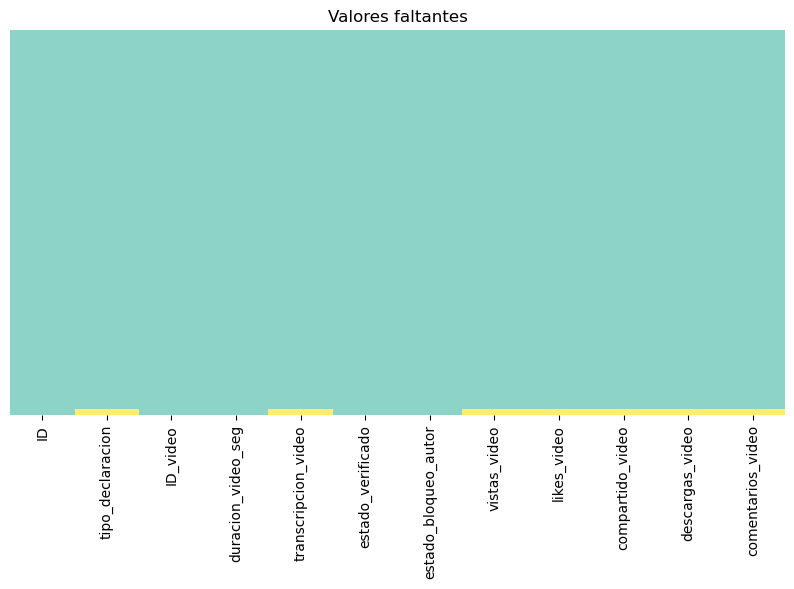

In [14]:
#Representación gráfica de los valores faltantes
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(tik_tok1.isnull(),yticklabels = False, cbar = False , cmap = 'Set3')
plt.title("Valores faltantes")

<div class="alert alert-block alert-success">
Este gráfico nos permite corroborar visualmente las variables en que hay datos faltantes, que es la misma cantidad en todos los casos y que la proporción de los mismos es muy baja respecto a la cantidad de datos del dataset (< 2% como pudimos determinar previamente). 

</div>



In [15]:
#Eliminamos las filas con valores faltantes
tik_tok2 = tik_tok1.dropna(axis=0)

Text(0.5, 1.0, 'Valores faltantes post dropna')

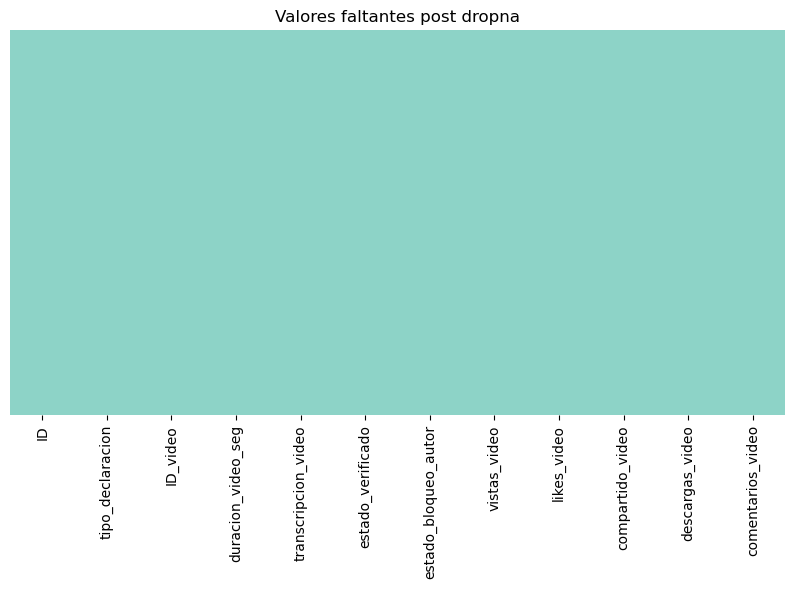

In [16]:
#Verificamos gráficamente la eliminación de las filas con valores faltantes
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(tik_tok2.isnull(),yticklabels = False, cbar = False , cmap = 'Set3')
plt.title("Valores faltantes post dropna")

<div class="alert alert-block alert-success">
Este gráfico permite corroborar que el dataset no presenta datos faltantes. 

</div>



In [17]:
#Información del dataset luego de eliminar los datos faltantes
tik_tok2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    19084 non-null  int64  
 1   tipo_declaracion      19084 non-null  object 
 2   ID_video              19084 non-null  int64  
 3   duracion_video_seg    19084 non-null  int64  
 4   transcripcion_video   19084 non-null  object 
 5   estado_verificado     19084 non-null  object 
 6   estado_bloqueo_autor  19084 non-null  object 
 7   vistas_video          19084 non-null  float64
 8   likes_video           19084 non-null  float64
 9   compartido_video      19084 non-null  float64
 10  descargas_video       19084 non-null  float64
 11  comentarios_video     19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [18]:
print(tik_tok1.shape)
print(tik_tok2.shape)

(19382, 12)
(19084, 12)


In [19]:
#Cantidad de videos incluidos en el dataset
print(tik_tok2['ID_video'].unique().shape)

(19084,)


<div class="alert alert-block alert-success">
El dataset resultante de la eliminación de datos faltantes presenta 19084 registros, es decir que se removieron 298 registros del dataset original. Cada uno de esos registros, representa un video de Tik Tok distinto. </div>


In [20]:
#Obtenemos las estadísticas descriptivas básicas del datset sin datos faltantes
tik_tok2.describe()

,ID,ID_video,duracion_video_seg,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video
count,19084.0,19084.0,19084.0,19084.0,19084.0,19084.0,19084.0,19084.0
mean,9542.5,5624839917.9,32.4,254708.6,84304.6,16735.2,1049.4,349.3
std,5509.2,2537030180.3,16.2,322893.3,133420.5,32036.2,2004.3,799.6
min,1.0,1234959018.0,5.0,20.0,0.0,0.0,0.0,0.0
25%,4771.8,3425100251.2,18.0,4942.5,810.8,115.0,7.0,1.0
50%,9542.5,5609500370.0,32.0,9954.5,3403.5,717.0,46.0,9.0
75%,14313.2,7840823300.5,47.0,504327.0,125020.0,18222.0,1156.2,292.0
max,19084.0,9999873075.0,60.0,999817.0,657830.0,256130.0,14994.0,9599.0


In [21]:
#Guardar la versión del dataset sin datos faltantes
tik_tok2.to_csv('tik_tok2.csv')

## VISUALIZACIÓN DE LOS DATOS

In [22]:
#Importamos las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Lectura del dataset sin datos faltantes
tik_tok2= pd.read_csv('../Data/tik_tok2.csv',delimiter=';',encoding='utf8')
tik_tok2

,Unnamed: 0,ID,tipo_declaracion,ID_video,duracion_video_seg,transcripcion_video,estado_verificado,estado_bloqueo_autor,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


## Variables numéricas

### Visualizar la distribución de las variables mediante histogramas

In [24]:
#Consultar cuáles son las variables numéricas
tik_tok2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19084 non-null  int64  
 1   ID                    19084 non-null  int64  
 2   tipo_declaracion      19084 non-null  object 
 3   ID_video              19084 non-null  int64  
 4   duracion_video_seg    19084 non-null  int64  
 5   transcripcion_video   19084 non-null  object 
 6   estado_verificado     19084 non-null  object 
 7   estado_bloqueo_autor  19084 non-null  object 
 8   vistas_video          19084 non-null  float64
 9   likes_video           19084 non-null  float64
 10  compartido_video      19084 non-null  float64
 11  descargas_video       19084 non-null  float64
 12  comentarios_video     19084 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.9+ MB


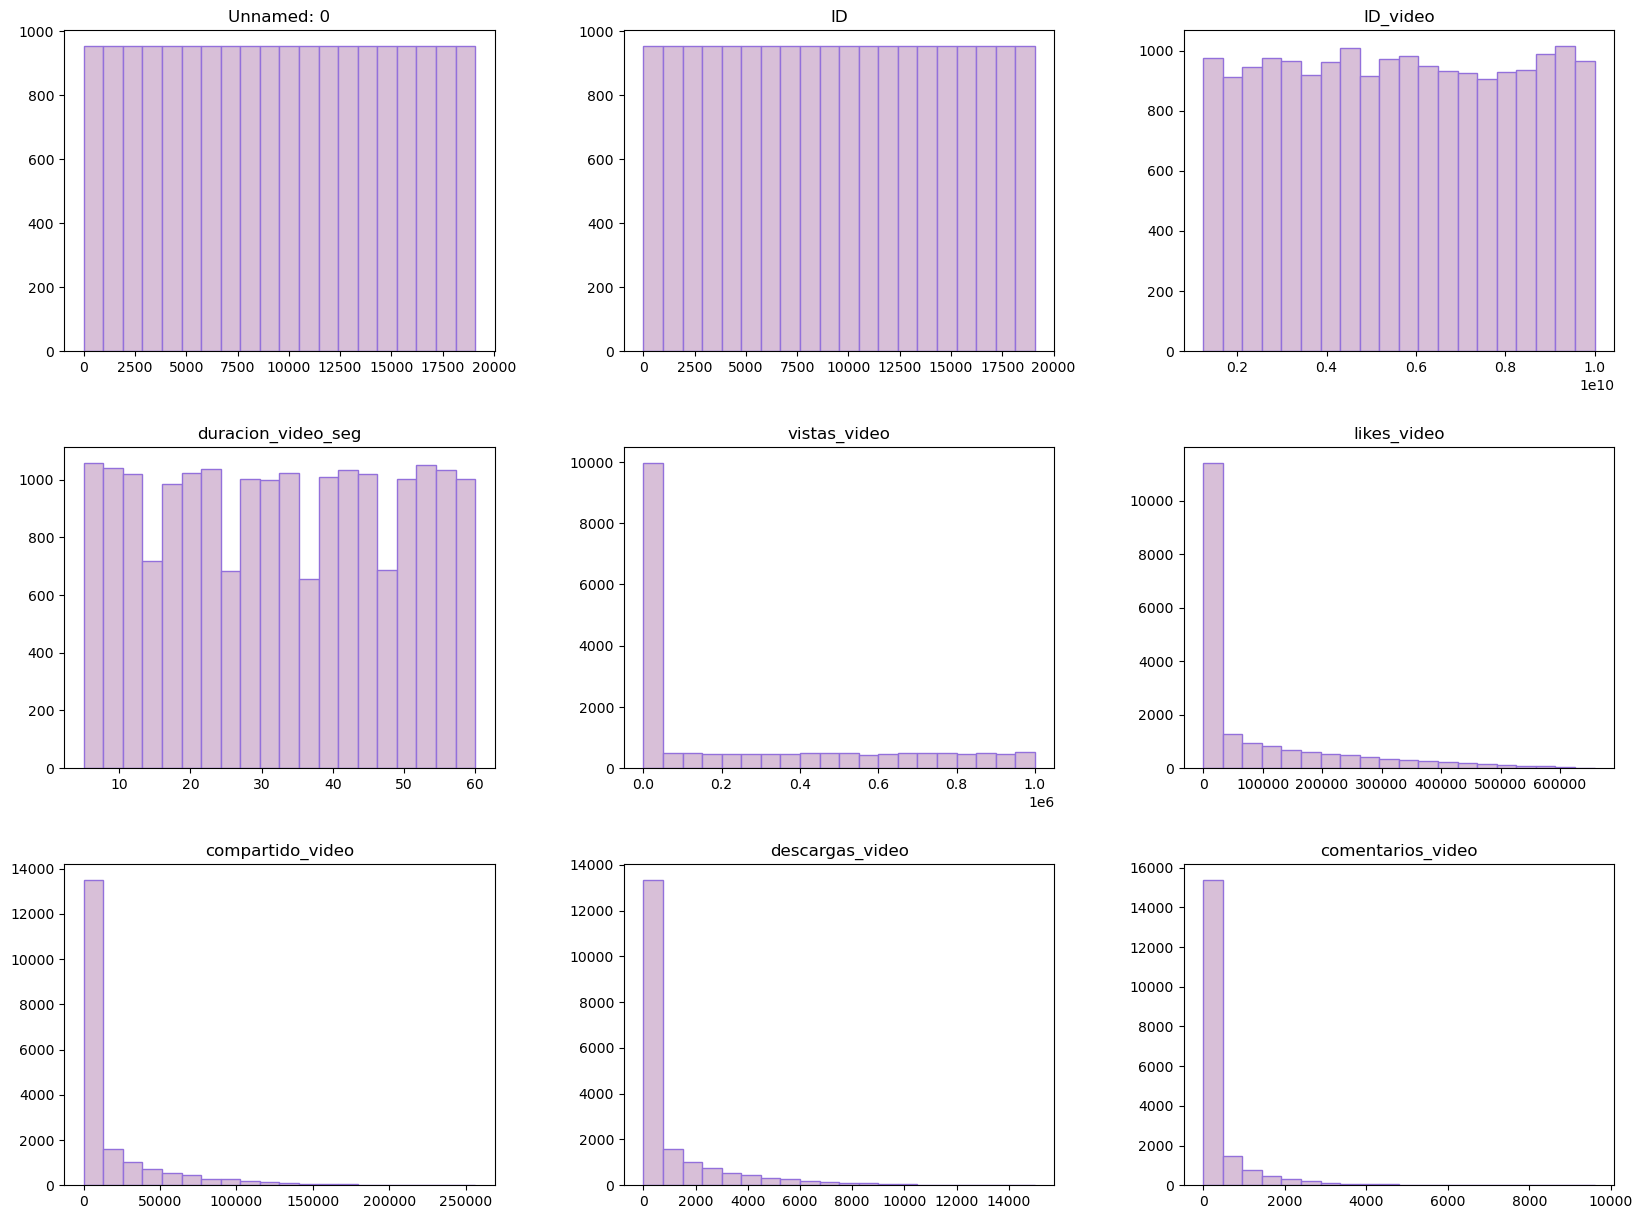

In [25]:
#Graficamos los histogramas de todas las variables numéricas del dataset
hist=tik_tok2.hist(bins=20, figsize=(20, 15),grid=False,  color = "thistle", ec="mediumpurple", lw=1)

<div class="alert alert-block alert-success">
    
Como es de esperarse, las variables identificatorias  **Unnamed: 0**, **ID**, **ID_video** presentan una distribución uniforme y no aportarían información por lo que podrían ser eliminadas en futuros análisis. 
    
La variable **duracion_video_seg** también tiene una distribución uniforme, que va entre los 5 y los 60 segundos.
    
El resto de las variables numéricas analizadas presentan una distribución fuertemente sesgada a la derecha.    

Respecto a la variable **vistas_video**, hay una diferencia muy marcada entre al cantidad de videos con menos de 50.000 vistas (más de la mitad de los datos) y los de más de 50.000 vistas. Estos últimos, tienen una distribución homogénea). 

En la variable **likes_video** hay mayor cantidad de videos con menos likes. La mayoría de los videos tienen menos de 35.000 likes.

Para la variable **compartido_video**, la mayoría de videos han sido compartidos menos de 12.500 veces.

En cuanto a la variable **descargas_video** la mayor cantidad de videos fueron descargados menos de 1.000 veces, con un máximo de 14.994 descargas para un video. 

Para la variable **comentarios_video**, los videos se agrupan en la parte inferior del rango de valores de recuento de comentarios. La mayoría de los videos tienen menos de 500 comentarios. La distribución de esta variable presenta una fuerte asimetría hacia la derecha.

**Del análisis visual del dataset se desprende que la mayoría de las variables numéricas bajo estudio presentan una distribución asimétrica, con la mayor frecuencia de ocurrencia hacia los menores valores. Asimismo, queda claro que sería interesante/necesario normalizar las variables para unificar las escalas de las mismas.**  </div>

### Visualizar la distribución de las variables mediante gráficos de densidad

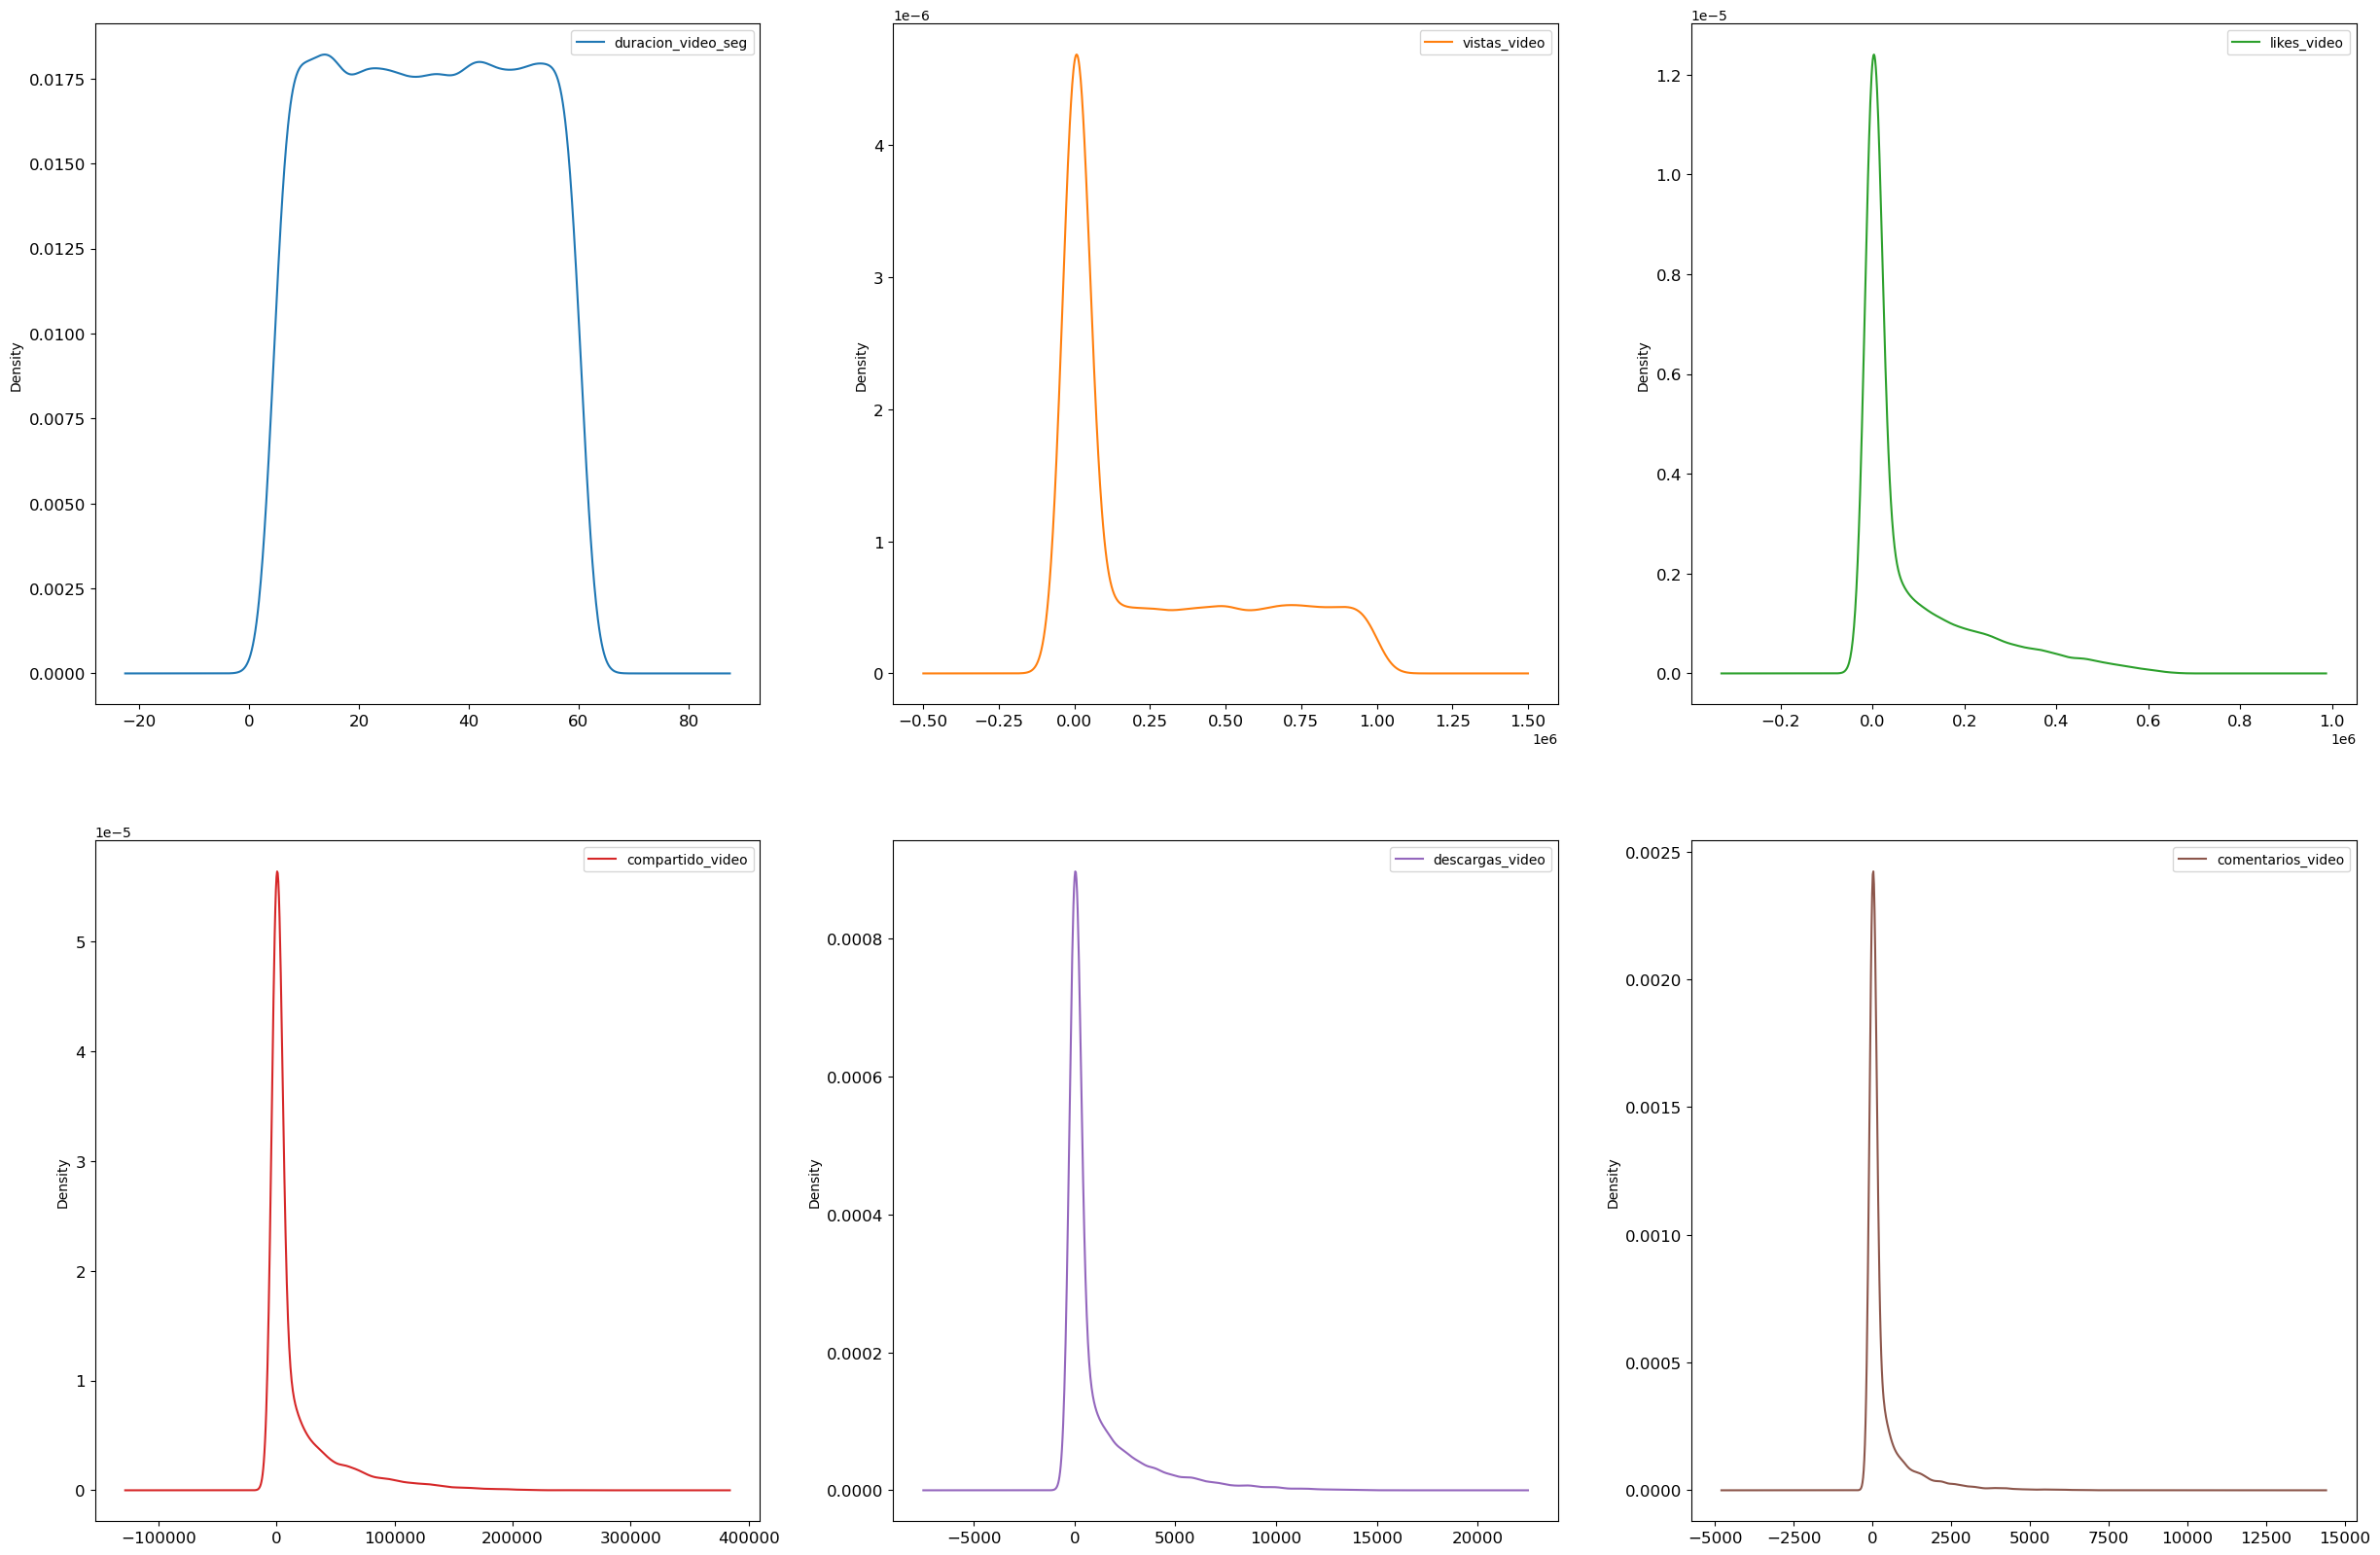

In [26]:
#Ploteamos los graficos de densidad de todas las variables del dataset
plt = tik_tok2[['duracion_video_seg','vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video']].plot(kind= 'density', subplots=True, layout=(2,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(30,20))

<div class="alert alert-block alert-success">
Mediante estos gráficos de densidad podemos observar, nuevamente, el sesgo de las variables hacia la derecha.
    
   
*Aclaración: Los valores que tienden a +- ∞ son propios del gráfico, no del dataset*.</div>

### Visualizar la distribución de las variables mediante diagramas de caja (box plots)

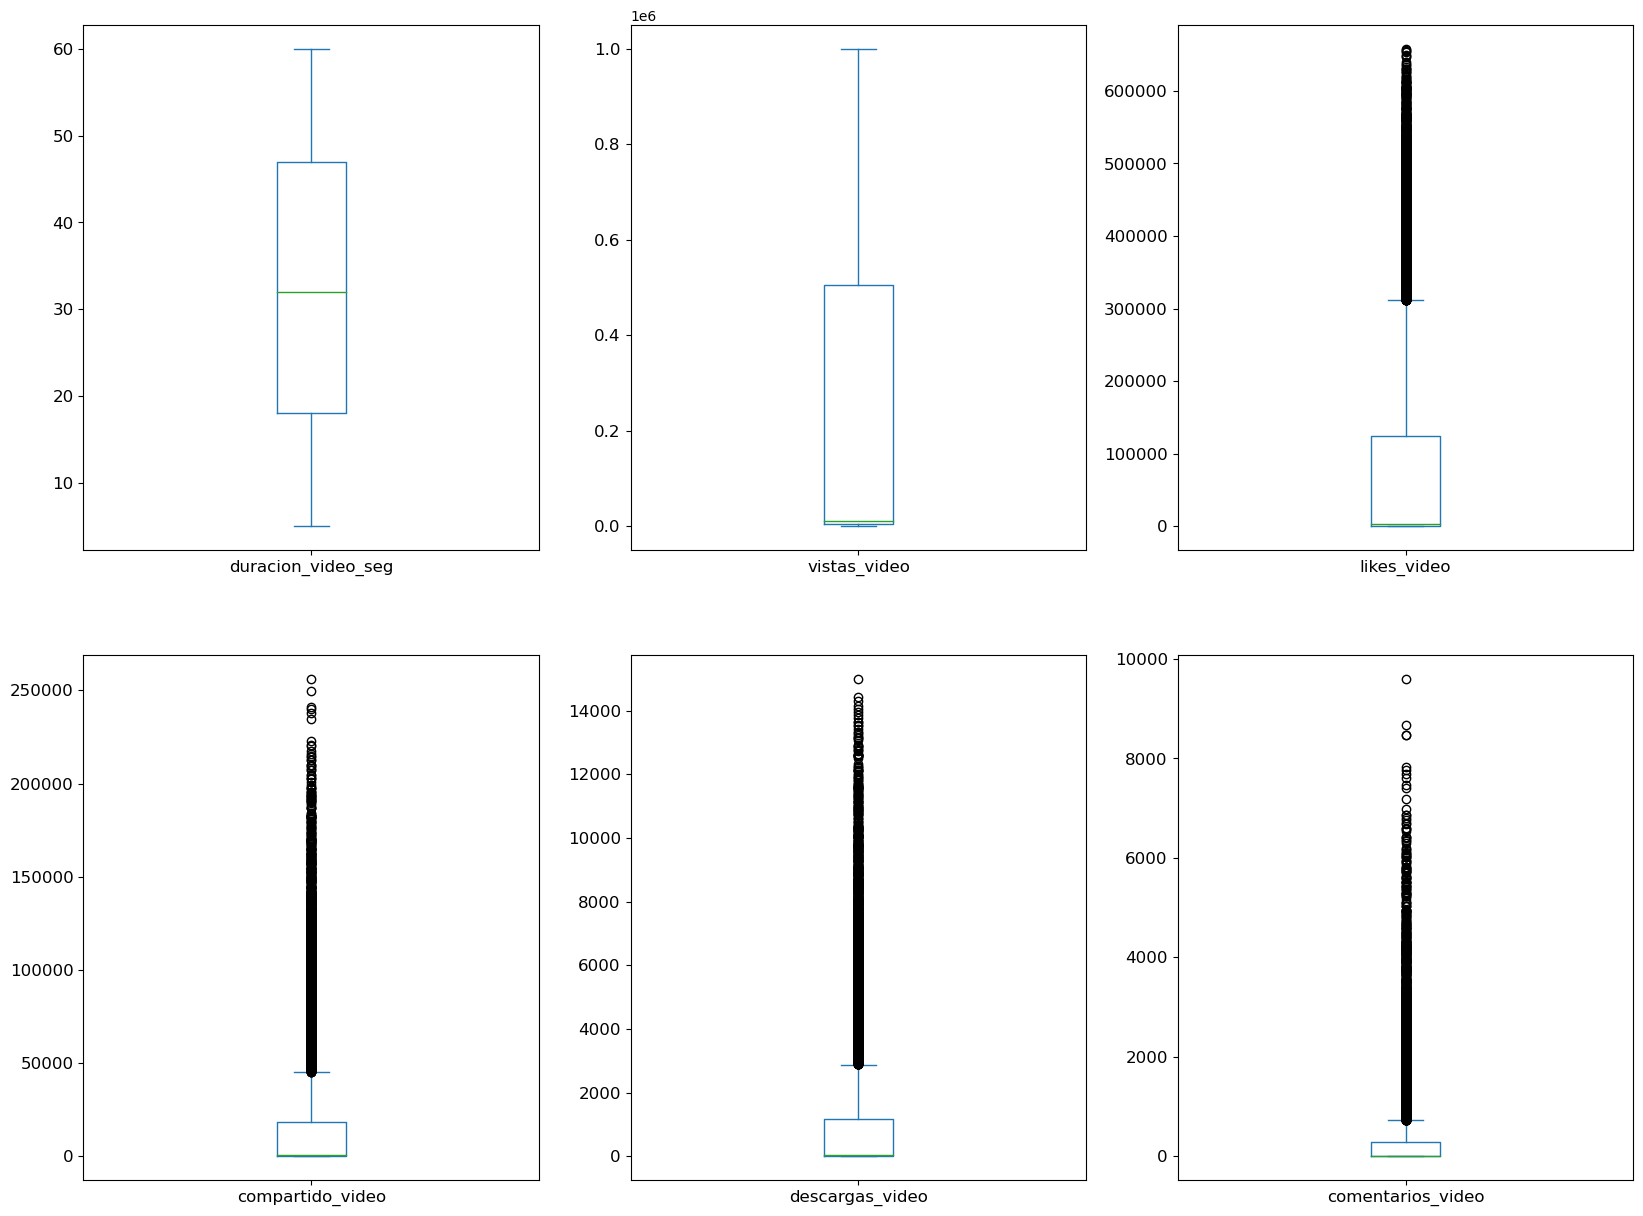

In [27]:
plt=tik_tok2[['duracion_video_seg','vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video']].plot(kind= 'box' , subplots=True, layout=(2,3), sharex=False, sharey=False,fontsize=12,figsize=(20,15))

<div class="alert alert-block alert-success">
Estos diagramas nos permiten confirmar la asimetría en la distribución de la mayoría de las variables (salvo la duración de los videos) y que los datos se concentran en la parte inferior de las distribuciones.
    
Tamnbién se puede observar que los valores atípicos se ubican más allá del límite superior.

</div>

<div class="alert alert-block alert-warning">
Habría que normalizar e inspeccionar en mayor detalle sobre todo las 4 variables que tienen valores atípicos antes de aplicar un algoritmo de machine learning.
</div>

AttributeError: 'Series' object has no attribute 'show'

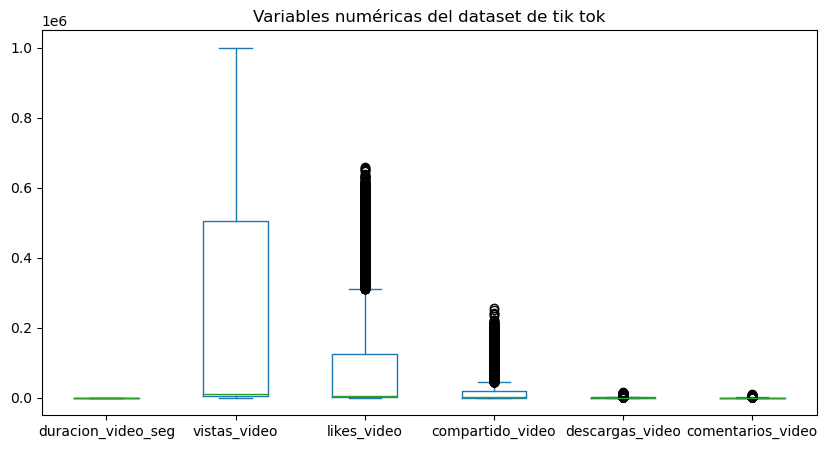

In [28]:
#Graficamos los diagramas de caja con las variables normalizadas
ax = tik_tok2[['duracion_video_seg','vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video']].plot(kind='box', title='Variables numéricas del dataset de tik tok')
plt.show()

<div class="alert alert-block alert-success">
Este gráfico permite resumir las variables numéricas en forma de diagrama de caja, con las variables normalizadas lo cual permite una mejor comparación entre ellas.

Podemos observar que todas las variables tienen valores medianos muy similares entre sí y que la dispersión de los valores atípicos de las variables descarga y comentarios es bastante inferior a la que se podía llegar a interpretar erróneamente en el gráfico sin normalizar.  

El largo de las cajas (rango intercuartílico) nos da una idea de la dispersión de cada una de las variables. Así, podemos concluir que la mayor dispersión se da en las variable de cantidad de vistas y de likes.
</div>

## Outliers

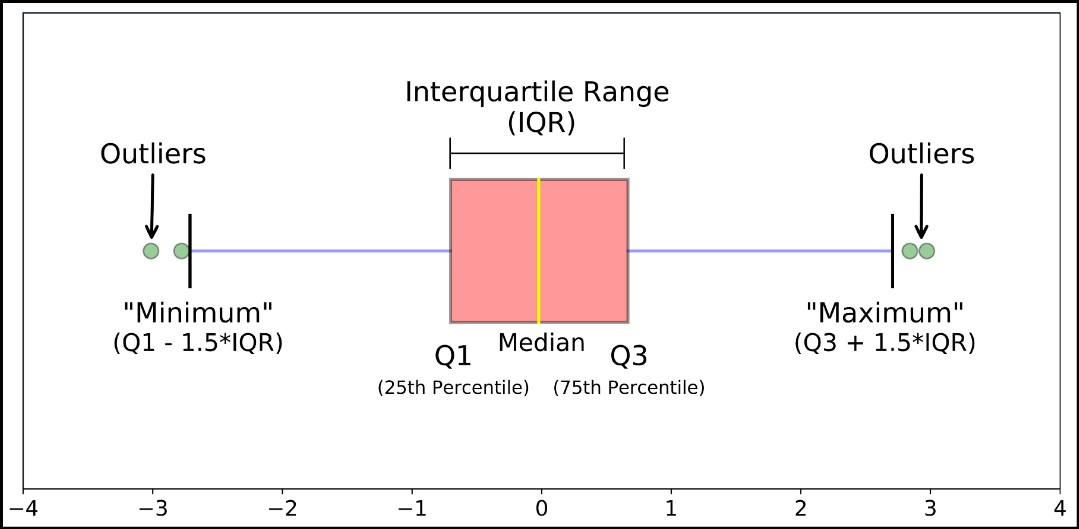

La cantidad de outliers se obtiene multiplicando el rango intercuartílico (IQR) del diagrama de caja por 1,5.

In [30]:
conteo_colum = ['vistas_video',
              'likes_video',
              'compartido_video',
              'descargas_video',
              'comentarios_video']

for column in conteo_colum:
    q1 = tik_tok2[column].quantile(0.25)
    q3 = tik_tok2[column].quantile(0.75)
    iqr = q3 - q1
    median = tik_tok2[column].median()
    outlier_threshold = median + 1.5*iqr

# Contar la cantidad de valores
outlier_conteo = (tik_tok2[column] > outlier_threshold).sum()
print(f'Número de outliers de la variable {column}:', outlier_conteo)

Número de outliers de la variable comentarios_video: 3882


<div class="alert alert-block alert-danger">
<b> El código anterior no está corriendo para todas las columnas!No logramos descubrir los motivos.
</div>

<div class="alert alert-block alert-success">
El método utilizado calcula la mediana para cada variable y luego suma 1,5 veces el rango intercuartil. Esto resulta en un umbral que, en este caso, es mucho más bajo de lo que sería si se utilizara el tercer cuartil.  
</div>

 

### Relación entre variables: matriz de correlación

In [31]:
tik_tok2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19084 non-null  int64  
 1   ID                    19084 non-null  int64  
 2   tipo_declaracion      19084 non-null  object 
 3   ID_video              19084 non-null  int64  
 4   duracion_video_seg    19084 non-null  int64  
 5   transcripcion_video   19084 non-null  object 
 6   estado_verificado     19084 non-null  object 
 7   estado_bloqueo_autor  19084 non-null  object 
 8   vistas_video          19084 non-null  float64
 9   likes_video           19084 non-null  float64
 10  compartido_video      19084 non-null  float64
 11  descargas_video       19084 non-null  float64
 12  comentarios_video     19084 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.9+ MB


In [32]:
#Calculamos la matriz de correlación para las variables numéricas
corr = tik_tok2[['duracion_video_seg','vistas_video', 'likes_video', 'compartido_video', 'descargas_video',
       'comentarios_video']].corr()

AttributeError: 'Series' object has no attribute 'show'

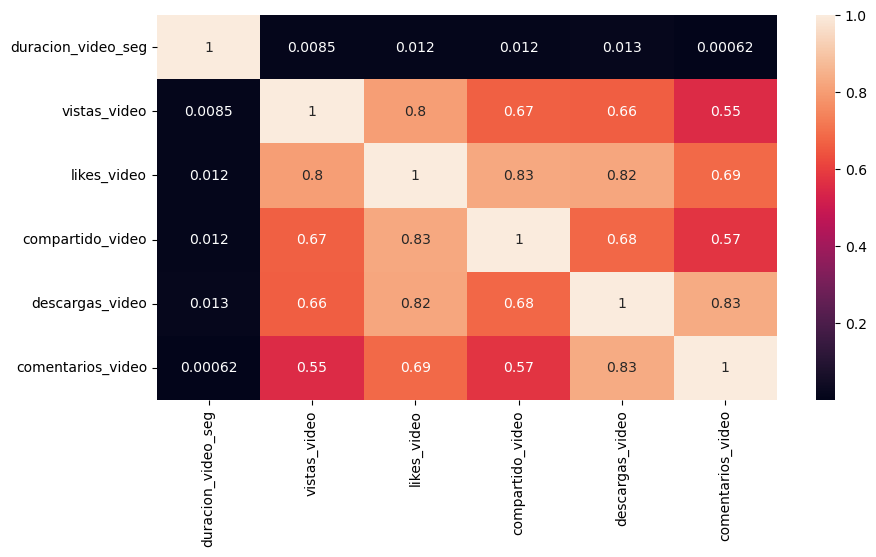

In [33]:
#Representación visual de la matriz de correlación
sns.heatmap(corr, annot=True)
plt.show()

<div class="alert alert-block alert-success">
La matriz de correlación muestra los valores de correlación, que son los que miden el grado de relación lineal entre cada par de variables. 

* Podemos observar que todos los valores de correlación obtenidos son  positivos, es decir que las variables tienden a aumentar al mismo tiempo. 
    
* Todas las variables analizadas tienen alguún tipo de relación ya que ningún valor de correlación es cercano a 0.
    
* La variable que presenta la mayor correlación con otras variables parecería ser likes_video.     
</div>

 

<div class="alert alert-block alert-warning">
Consideración:¿Los datos son independientes?¿La población sigue una distribución normal?.
</div>

## Variables categóricas


In [35]:
tik_tok2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19084 non-null  int64  
 1   ID                    19084 non-null  int64  
 2   tipo_declaracion      19084 non-null  object 
 3   ID_video              19084 non-null  int64  
 4   duracion_video_seg    19084 non-null  int64  
 5   transcripcion_video   19084 non-null  object 
 6   estado_verificado     19084 non-null  object 
 7   estado_bloqueo_autor  19084 non-null  object 
 8   vistas_video          19084 non-null  float64
 9   likes_video           19084 non-null  float64
 10  compartido_video      19084 non-null  float64
 11  descargas_video       19084 non-null  float64
 12  comentarios_video     19084 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.9+ MB


<div class="alert alert-block alert-success">
Las variables categóricas del dataset son las siguientes:
    
* tipo_declaracion
* transcripcion_video
* estado_verificado
* estado_bloqueo_autor
   </div>

<div class="alert alert-block alert-warning">
La variable transcripcion_video deberá ser transformada para poder analizarla junto con las otras variables.
</div>

A partir de la representación gráfica de las variables categóricas veremos si podemos descubrir alguna relación entre ellas

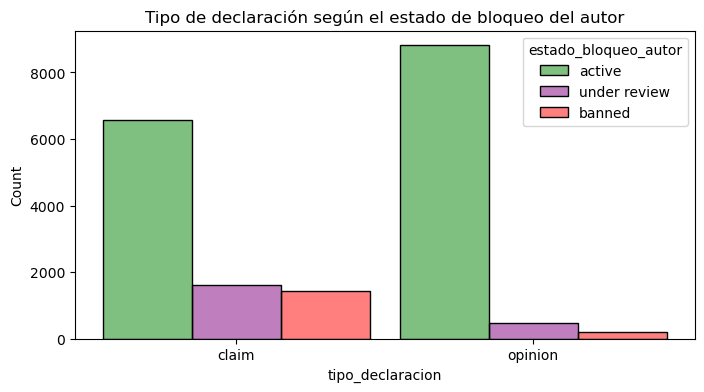

In [46]:
#Generamos un histograma que muestre el tipo de declaración según el estado de bloqueo del autor
fig = plt.figure(figsize=(8,4))
sns.histplot(tik_tok2, x='tipo_declaracion', hue='estado_bloqueo_autor',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'purple', 'banned':'red'},
             alpha=0.5)
plt.title('Tipo de declaración según el estado de bloqueo del autor');

<div class="alert alert-block alert-success">
Los autores activos generan más declaraciones que los autores no activos (under review y banned). 

    
A la vez, los autores activos parecen generar más opiniones que reclamos.  
</div>

 

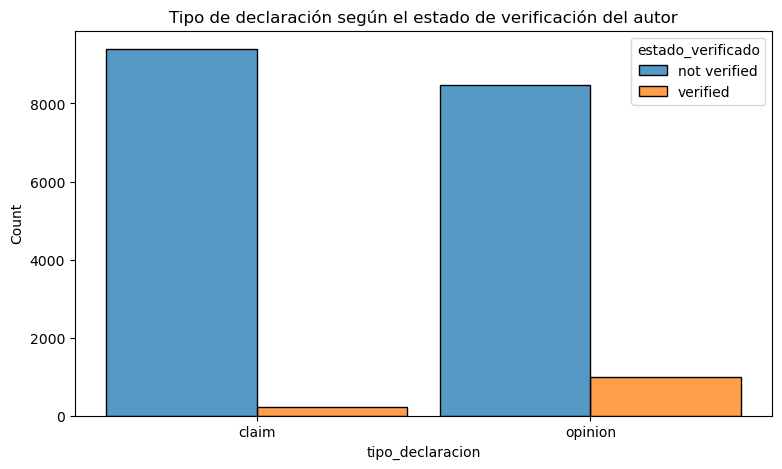

In [47]:
#Generamos un histograma que muestre el tipo de declaración según el estado de verificación del autor
plt.figure(figsize=(9,5))
sns.histplot(tik_tok2,
             x='tipo_declaracion', hue='estado_verificado',
             multiple='dodge', shrink=0.9)
plt.title('Tipo de declaración según el estado de verificación del autor');

<div class="alert alert-block alert-success">
Los reclamos y opiniones generados por los autores no verificados supera ampliamente a los generados por los autores verificados. 
</div>

 

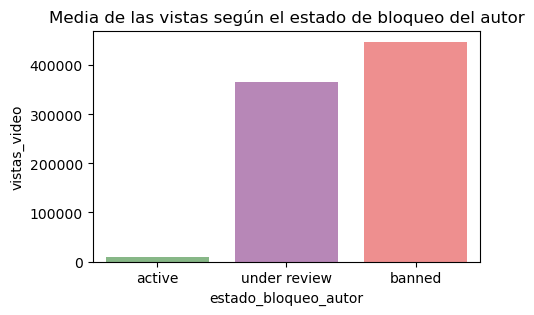

In [49]:
conteo_bloqueados = tik_tok2.groupby(['estado_bloqueo_autor']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(conteo_bloqueados,
            x='estado_bloqueo_autor',
            y='vistas_video',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'purple', 'banned':'red'},
            alpha=0.5)
plt.title('Media de las vistas según el estado de bloqueo del autor');

<div class="alert alert-block alert-success">
Los autores bloqueados tienen una cantidad media de vistas superior a la de los autores activos. 
</div>

## INFERENCIAS A PARTIR DE LOS DATOS

Suponiendo que intentaremos predecir la declaración que tendrá un video, queremos ver la relación de esta variable con el resto del dataset

In [39]:
print(tik_tok2.groupby('tipo_declaracion')['duracion_video_seg'].count())
print(tik_tok2.groupby('tipo_declaracion')['duracion_video_seg'].median())

tipo_declaracion
claim      9608
opinion    9476
Name: duracion_video_seg, dtype: int64
tipo_declaracion
claim     32.0
opinion   32.0
Name: duracion_video_seg, dtype: float64


In [40]:
print(tik_tok2.groupby('tipo_declaracion')['vistas_video'].count())
print(tik_tok2.groupby('tipo_declaracion')['vistas_video'].median())

tipo_declaracion
claim      9608
opinion    9476
Name: vistas_video, dtype: int64
tipo_declaracion
claim     501555.0
opinion     4953.0
Name: vistas_video, dtype: float64


In [41]:
print(tik_tok2.groupby('tipo_declaracion')['likes_video'].count())
print(tik_tok2.groupby('tipo_declaracion')['likes_video'].median())

tipo_declaracion
claim      9608
opinion    9476
Name: likes_video, dtype: int64
tipo_declaracion
claim     123649.0
opinion      823.0
Name: likes_video, dtype: float64


In [42]:
print(tik_tok2.groupby('tipo_declaracion')['compartido_video'].count())
print(tik_tok2.groupby('tipo_declaracion')['compartido_video'].median())

tipo_declaracion
claim      9608
opinion    9476
Name: compartido_video, dtype: int64
tipo_declaracion
claim     17997.5
opinion     121.0
Name: compartido_video, dtype: float64


In [43]:
print(tik_tok2.groupby('tipo_declaracion')['descargas_video'].count())
print(tik_tok2.groupby('tipo_declaracion')['descargas_video'].median())

tipo_declaracion
claim      9608
opinion    9476
Name: descargas_video, dtype: int64
tipo_declaracion
claim     1139.5
opinion      7.0
Name: descargas_video, dtype: float64


In [44]:
print(tik_tok2.groupby('tipo_declaracion')['comentarios_video'].count())
print(tik_tok2.groupby('tipo_declaracion')['comentarios_video'].median())

tipo_declaracion
claim      9608
opinion    9476
Name: comentarios_video, dtype: int64
tipo_declaracion
claim     286.0
opinion     1.0
Name: comentarios_video, dtype: float64


<Axes: xlabel='tipo_declaracion', ylabel='comentarios_video'>

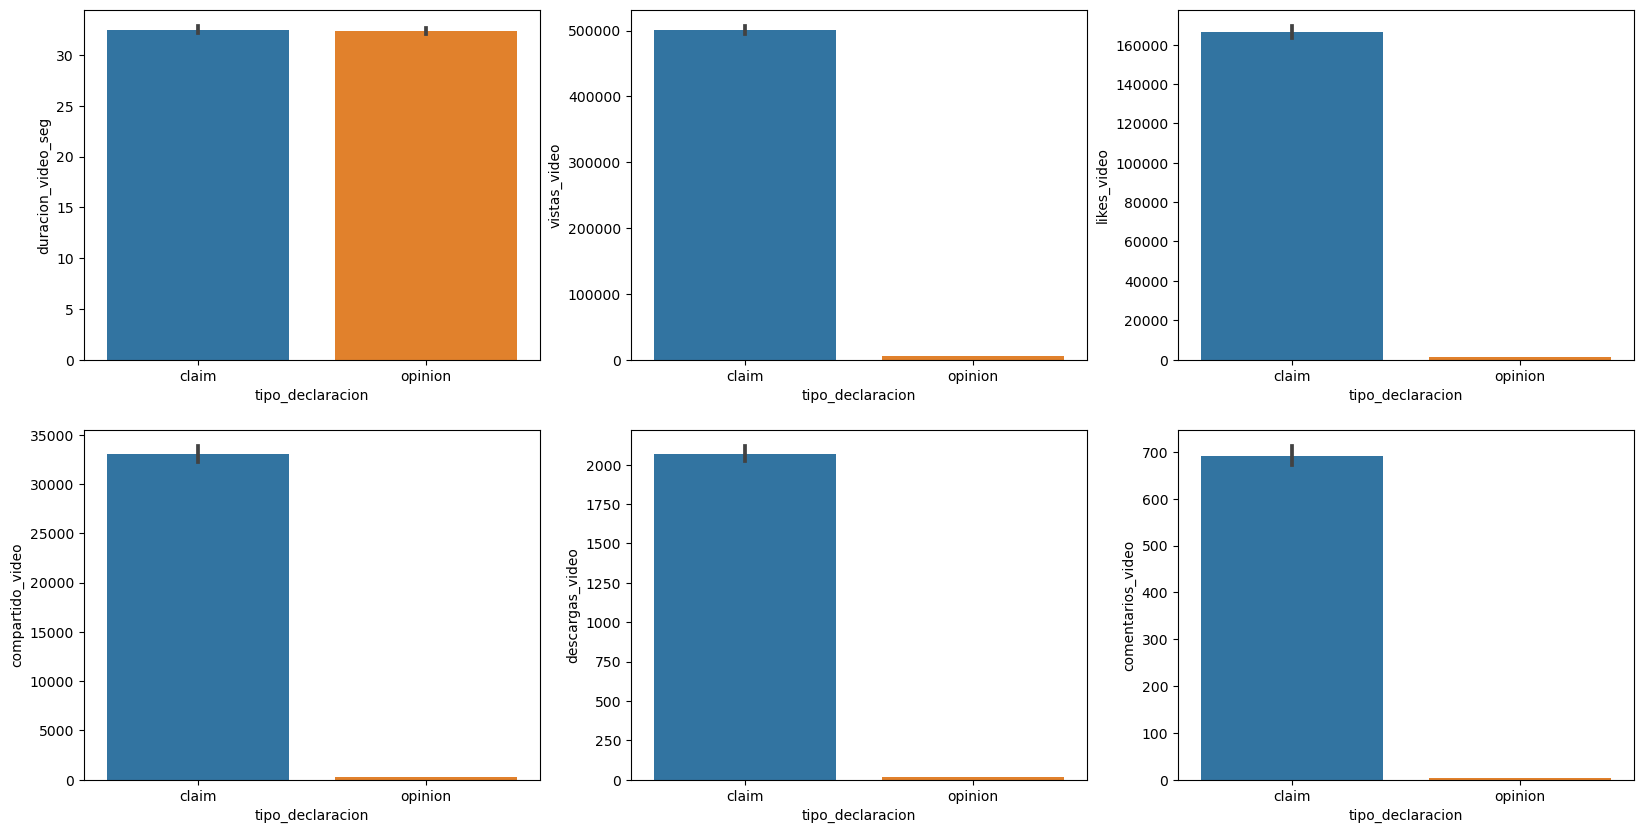

In [45]:
#Graficamos lo calculado arriba
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
 
sns.barplot(ax=axes[0, 0], data=tik_tok2, x='tipo_declaracion', y='duracion_video_seg')
sns.barplot(ax=axes[0, 1], data=tik_tok2, x='tipo_declaracion', y='vistas_video')
sns.barplot(ax=axes[0, 2], data=tik_tok2, x='tipo_declaracion', y='likes_video')
sns.barplot(ax=axes[1, 0], data=tik_tok2, x='tipo_declaracion', y='compartido_video')
sns.barplot(ax=axes[1, 1], data=tik_tok2, x='tipo_declaracion', y='descargas_video')
sns.barplot(ax=axes[1, 2], data=tik_tok2, x='tipo_declaracion', y='comentarios_video')

<div class="alert alert-block alert-success">    
Los reclamos (claim) tienen una relación positiva más estrecha que las opiniones con casi todas las variables numéricas del dataset, salvo en la variable de duración del video. </div> 

## CONCLUSIÓN DE LA EXPLORACIÓN Y PROCESAMIENTO DE LOS DATOS
<div class="alert alert-block alert-success">    
La mediana de casi todas las variables numéricas ('vistas_video', 'likes_video', 'compartido_video', 'descargas_video' y 'comentarios_video') del dataset para los reclamos (claim) es muy superior a la que se observa en las opiniones, salvo en la variable de duración del video. Por ello, creemos que  ellas serían útiles para intentar predecir el tipo de declaración (claim y opinion) que contendrá un video.</div> 